# Sentiment Analysis for Songs

In this assignment, you'll analyze the emotional tone of songs using sentiment analysis. You'll discover which artists are the most positive or negative, and which songs have the strongest emotional content.

## Assignment Overview

You will:
1. Load the lyrics dataset
2. Learn how to use TextBlob for sentiment analysis
3. Calculate sentiment scores for songs and artists
4. Find the most positive and negative songs/artists

# Part 1: Setup and Import

In [2]:
# JUST RUN THIS, no changes needed

from google.colab import drive
import pandas as pd
from textblob import TextBlob

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/datasets/lyrics.csv')

# FIXUP DATA
df["Title"] = df["Title"].str.replace("\u200b", "")
df["Lyric"] = df["Lyric"].str.replace("\u200b", "")

# Look at the data
print(f"Total songs: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Mounted at /content/gdrive
Total songs: 5981
Columns: ['Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric']


,Artist,Title,Album,Year,Date,Lyric
0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...


# Understanding Sentiment Analysis

TextBlob gives us two measures:

1. **Polarity:** Ranges from -1 (most negative) to +1 (most positive)
2. **Subjectivity:** Ranges from 0 (objective) to 1 (subjective)

```python
# Example of sentiment analysis
# JUST RUN THIS to see how it works

test_sentences = [
    "I love this amazing song!",
    "This music is terrible and boring.",
    "The song has three verses.",
    "I feel so happy when I hear this!"
]

for sentence in test_sentences:
    blob = TextBlob(sentence)
    print(f"Text: '{sentence}'")
    print(f"  Polarity: {blob.sentiment.polarity:.3f}")
    print(f"  Subjectivity: {blob.sentiment.subjectivity:.3f}")
    print()
```

# Part 2: Calculate Sentiment for One Song

## Hint

You can view all the artists with:

```python
print(df['Artist'].unique())
```

And all of a single artists songs with:

```python
print(df[df['Artist'] == my_artist]['Title'].unique())
```

In [3]:
def get_song_lyrics(df, artist, title):
    artist_df = df[df['Artist'] == artist]
    song_df = artist_df[artist_df['Title'] == title]
    return song_df['Lyric'].values[0]

def calculate_song_sentiment(lyrics):
    blob = TextBlob(lyrics)
    return blob.sentiment.polarity

# Test with one song
artist = "Dua Lipa"  # Change to your choice!
title = "New Rules"  # Change to your choice!

# Get the lyrics for this song
lyrics = get_song_lyrics(df, artist, title)

# Calculate sentiment
sentiment = calculate_song_sentiment(lyrics)
print(f"{artist} - {title}")
print(f"Sentiment: {sentiment:.3f}")
print("(Negative < 0 < Positive)")

Dua Lipa - New Rules
Sentiment: 0.129
(Negative < 0 < Positive)


# Part 3: Calculate Sentiment for Every Song

### Hint

Use `df.apply(...)` to calculate sentiment for every song.

`df.apply(...)` takes a function AS AN ARGUMENT and applys it to everything in that column returning a new column.

For example, if you wanted to make a new column of lyric lengths:

Use this pattern to create a new column for Sentiment

```python
def get_lyrics_length(lyrics):
    return len(lyrics)

df['lyric length'] = df['Lyric'].apply(get_lyric_length)
```

In [4]:
def add_sentiment_column(df):
    df['sentiment'] = df['Lyric'].apply(calculate_song_sentiment)
    return df

# Add sentiment scores to all songs
df = add_sentiment_column(df)

# Check it worked
print("Sentiment column added!")
print(df[['Artist', 'Title', 'sentiment']].head())

Sentiment column added!
     Artist                  Title  sentiment
0  Dua Lipa              New Rules   0.129119
1  Dua Lipa        Don’t Start Now   0.047727
2  Dua Lipa                  IDGAF  -0.042188
3  Dua Lipa  Blow Your Mind (Mwah)  -0.027778
4  Dua Lipa             Be the One  -0.218519


# Part 4: Find Most Positive and Negative Songs


## Hint
Use pandas' `.sort_values(...)` method to sort the rows by sentiment.
```python
sorted_ascending_df = df.sort_values(by="sentiment", ascending=True)
sorted_decending_df = df.sort_values(by="sentiment", ascending=False)
```

You can also loop over the dataframe to print:

```python
for idx, row in df.iterrows():
    title = df['Title']
    print(f"Row number: {idx}")
    print(f"Title: {title}")
```



In [5]:
def find_extreme_songs(df, artist, n=5):
    artist_df = df[df['Artist'] == artist]
    # artist_df = add_sentiment_column(artist_df)
    sorted_ascending_df = artist_df.sort_values(by="sentiment", ascending=True)
    sorted_decending_df = artist_df.sort_values(by="sentiment", ascending=False)

    print(f"Most negative {artist} songs:")
    for idx, row in sorted_ascending_df.head(n).iterrows():
        title = row['Title']
        sentiment = row['sentiment']
        print(f"{title}: {sentiment}")
    print("")
    print(f"Most positive {artist} songs:")
    for idx, row in sorted_decending_df.head(n).iterrows():
        title = row['Title']
        sentiment = row['sentiment']
        print(f"{title}: {sentiment}")


# Analyze your chosen artist
my_artist = "Taylor Swift"  # Change to your choice!
find_extreme_songs(df, my_artist)

Most negative Taylor Swift songs:
You Don’t Have To Call  Me: -0.5
Shake It Off: -0.4801963736746346
mad woman (the long pond studio sessions): -0.2991935483870967
mad woman: -0.2991935483870967
Bad Blood/Should’ve Said No: -0.28597132034632017

Most positive Taylor Swift songs:
Sugar: 0.6047619047619048
Your Face: 0.55
A Perfectly Good Heart: 0.5125000000000001
We Were Happy: 0.46812996031746035
Stay Beautiful: 0.4373511904761904


# Part 5: Calculate Artist Average Sentiment

### Hint

Reminder, here's the code from our slides on performing GroupBy on a dataframe of books where we were getting the `sum` of the `'qty'` column.

```
qty_by_genre = books_df.groupby('genre')['qty'].sum()

print("Total quantities by genre:")
for genre, total_qty in qty_by_genre.items():
    print(f"  {genre}: {total_qty}")
```


In [6]:
def calculate_artist_sentiment(df):
    avg_sentiment_by_artist = df.groupby("Artist")["sentiment"].mean()
    return avg_sentiment_by_artist

# Find most positive and negative artists
artist_sentiments = calculate_artist_sentiment(df)

print("Most Positive Artists:")
sorted_positive = artist_sentiments.sort_values(ascending=False)
print(sorted_positive.head(10))

print("\nMost Negative Artists:")
print(artist_sentiments.sort_values(ascending=True).head(10))

Most Positive Artists:
Artist
BTS (방탄소년단)      0.156454
Beyoncé          0.154366
Lady Gaga        0.118006
Selena Gomez     0.113847
Rihanna          0.112781
Ariana Grande    0.112551
Justin Bieber    0.109661
Coldplay         0.104174
Ed Sheeran       0.102402
Taylor Swift     0.098655
Name: sentiment, dtype: float64

Most Negative Artists:
Artist
Eminem          -0.022405
Cardi B         -0.008392
Post Malone      0.011655
Nicki Minaj      0.043692
Billie Eilish    0.051103
Maroon 5         0.062613
Khalid           0.064017
Dua Lipa         0.064369
Drake            0.075517
Charlie Puth     0.084802
Name: sentiment, dtype: float64


# Bonus: Sentiment Over Time

Try to use all of the above to calculate sentiment by year for an artist.



Taylor Swift's sentiment over time:
Year
2000.0    0.188889
2002.0   -0.107619
2004.0   -0.034282
2005.0    0.236879
2006.0    0.127760
2007.0    0.193686
2008.0    0.088091
2009.0    0.109882
2010.0    0.132594
2011.0    0.097697
2012.0    0.099283
2013.0    0.183186
2014.0    0.048464
2015.0    0.147340
2016.0    0.149062
2017.0    0.077728
2018.0    0.074908
2019.0    0.121716
2020.0    0.086666
2021.0    0.122953
Name: sentiment, dtype: float64


<Axes: title={'center': 'Taylor Swift Sentiment Timeline'}, xlabel='Year'>

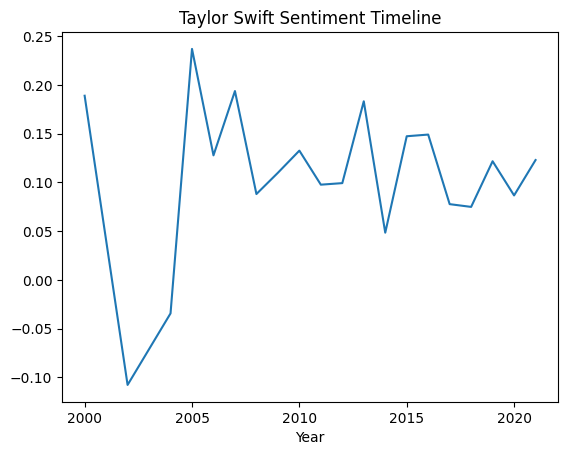

In [9]:
def analyze_sentiment_by_year(df, artist):
    # Filter by artist
    artist_df = df[df["Artist"] == artist]

    # Group by 'Year'
    sentiment_by_year = artist_df.groupby('Year')['sentiment'].mean()
    return sentiment_by_year

# Analyze how an artist's sentiment changed over time
artist_timeline = analyze_sentiment_by_year(df, my_artist)
print(f"\n{my_artist}'s sentiment over time:")
print(artist_timeline)

artist_timeline.plot(x='Year', y='sentiment', kind='line', title=f'{my_artist} Sentiment Timeline')